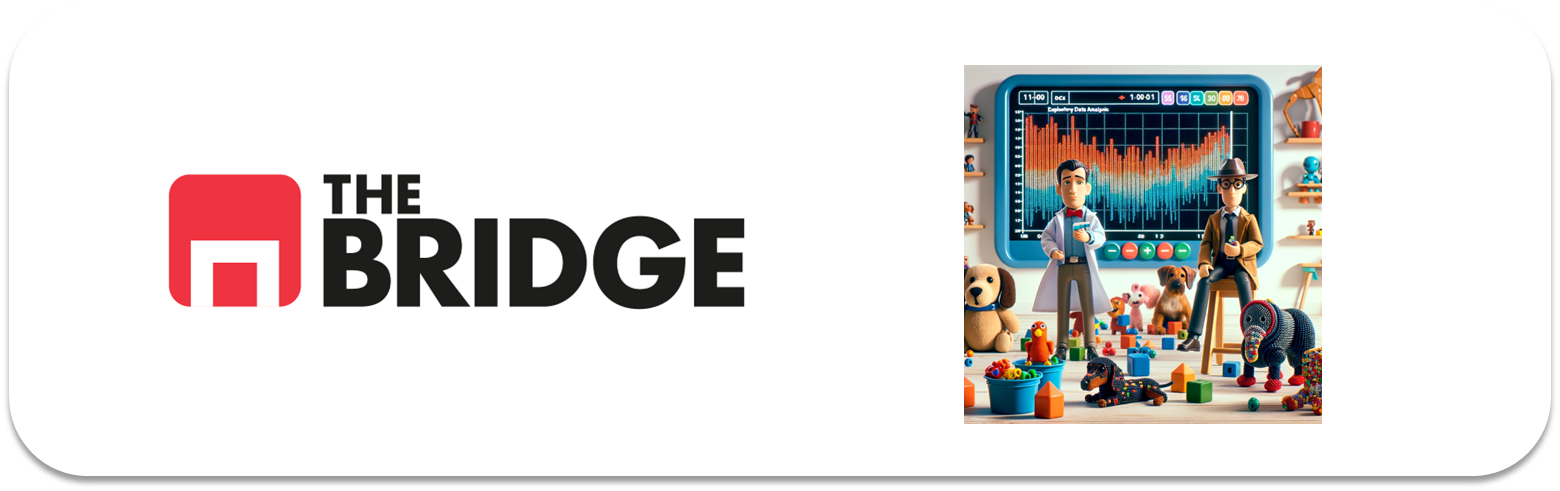

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_modif = df_titanic.copy()
df_modif.drop(columns = ["deck", "survived", "pclass", "embarked"], inplace = True)
df_modif

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df_modif["family_members"] = df_modif["parch"] + df_modif["sibsp"]
df_modif.drop(columns = ["parch","sibsp"], inplace = True)
df_modif

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
moda_embark_town = df_modif["embark_town"].mode()[0]
df_modif["embark_town"].fillna(moda_embark_town, inplace=True)
df_modif

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
media_edad_by_who = df_modif.groupby("who")["age"].mean()
df_modif["age"].fillna(df_modif["who"].map(media_edad_by_who), inplace = True)
df_modif

C:\Users\dchev\AppData\Local\Temp\ipykernel_19580\1800944885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modif["age"].fillna(df_modif["who"].map(media_edad_by_who), inplace = True)


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

### 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

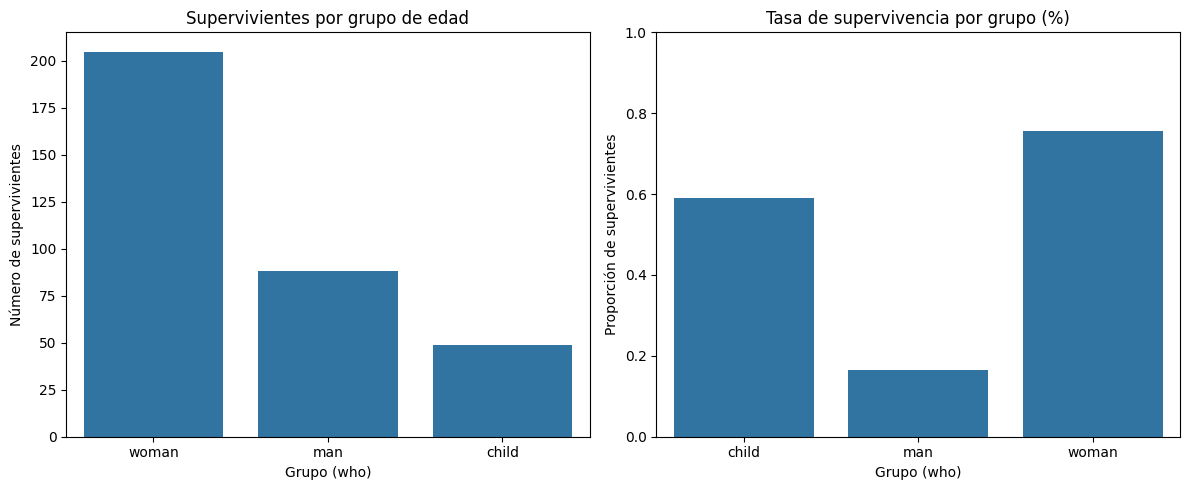

Test de independencia chi-cuadrado entre 'who' y 'alive'
Tabla de contingencia:
alive   no  yes
who            
child   34   49
man    449   88
woman   66  205

Estadístico chi2 = 283.923050324233
p-valor = 2.2227620817798914e-62
Existe una relación estadísticamente significativa entre el grupo (who) y la supervivencia.


In [21]:
from scipy.stats import chi2_contingency

frec_abs = df_modif[df_modif["alive"] == "yes"]["who"].value_counts()
frec_rel = df_modif.groupby("who")["alive"].value_counts(normalize=True).unstack()["yes"]  #Para evitar problemas con el multiindex que no paraba de dar error al graficarlo

#Gráficos
#Usamos barras porque estamos comparando una variable categórica con otra categórica binaria, luego solo queremos el conteo. Gráfico de barras es lo ideal
plt.figure(figsize=(12, 5))

#Absoluto
plt.subplot(1, 2, 1)
sns.barplot(x=frec_abs.index, y=frec_abs.values)
plt.title("Supervivientes por grupo de edad")
plt.ylabel("Número de supervivientes")
plt.xlabel("Grupo (who)")

#Relativo
plt.subplot(1, 2, 2)
sns.barplot(x=frec_rel.index, y=frec_rel.values)
plt.title("Tasa de supervivencia por grupo (%)")
plt.ylabel("Proporción de supervivientes")
plt.xlabel("Grupo (who)")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Test chi-cuadrado
contingencia = pd.crosstab(df_modif["who"], df_modif["alive"])
chi2, p, dof, expected = chi2_contingency(contingencia)

print("Test de independencia chi-cuadrado entre 'who' y 'alive'")
print("Tabla de contingencia:")
print(contingencia)
print(f"\nEstadístico chi2 = {chi2}")
print(f"p-valor = {p}")

if p < 0.05:
    print("Existe una relación estadísticamente significativa entre el grupo (who) y la supervivencia.")
else:
    print("No se detecta una relación estadísticamente significativa entre el grupo (who) y la supervivencia.")

#### Análisis absoluto
En términos absolutos, el mayor número de supervivientes fueron **mujeres**, seguidas de **hombres** y finalmente **niños**:

#### Análisis relativo
En términos relativos (proporción de supervivientes dentro de cada grupo), la **tasa de supervivencia** es mayor en **mujeres**, luego **niños** y finalmente **hombres**.

Esto indica que **ser mujer** o **niño** aumentaba considerablemente las probabilidades de supervivencia respecto a los hombres.

#### Test de independencia (Chi-cuadrado)
Se realizó un test $\chi^2$ para analizar si existe una relación estadísticamente significativa entre el grupo (`who`) y la variable `alive` (supervivencia).

Dado que el p-valor es muy cercano a 0, **existe una relación estadísticamente significativa** entre el grupo (`who`) y la probabilidad de haber sobrevivido al Titanic.

### 2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

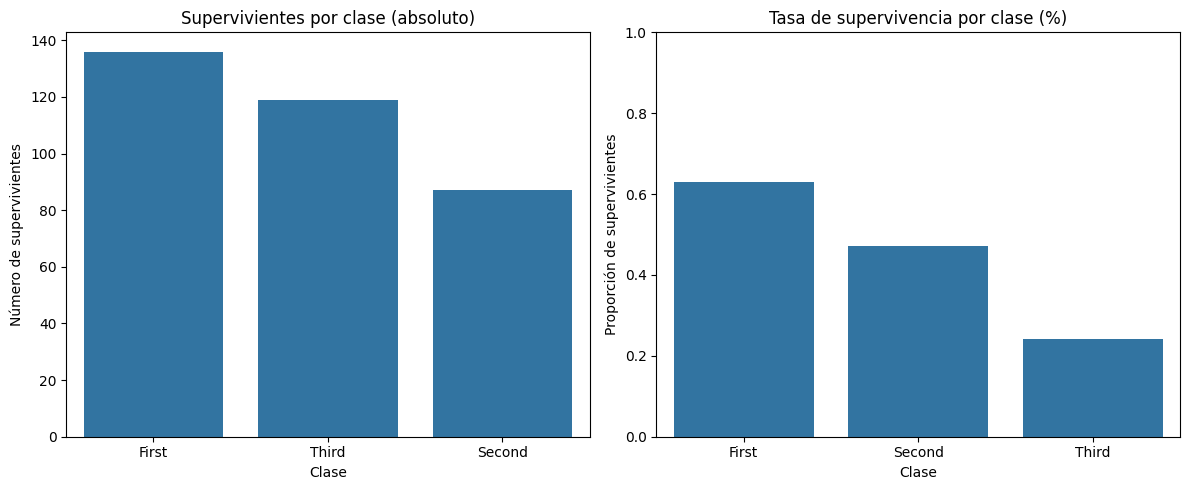

Test de independencia chi-cuadrado entre 'class' y 'alive'
Tabla de contingencia:
alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119

Estadístico $\chi^2$ = 102.88898875696056
p-valor = 4.549251711298793e-23
Existe una relación estadísticamente significativa entre la clase y la supervivencia.


In [22]:
#Es casi una réplica del código anterior cambiando columnas

frec_abs_class = df_modif[df_modif["alive"] == "yes"]["class"].value_counts()
frec_rel_class = (df_modif.groupby("class")["alive"].value_counts(normalize=True).unstack()["yes"])

#Gráficos
plt.figure(figsize=(12, 5))

#Absolutos
plt.subplot(1, 2, 1)
sns.barplot(x=frec_abs_class.index, y=frec_abs_class.values)
plt.title("Supervivientes por clase (absoluto)")
plt.ylabel("Número de supervivientes")
plt.xlabel("Clase")

#Relativos
plt.subplot(1, 2, 2)
sns.barplot(x=frec_rel_class.index, y=frec_rel_class.values)
plt.title("Tasa de supervivencia por clase (%)")
plt.ylabel("Proporción de supervivientes")
plt.xlabel("Clase")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

#Test chi-cuadrado
contingencia_class = pd.crosstab(df_modif["class"], df_modif["alive"])
chi2, p, dof, expected = chi2_contingency(contingencia_class)

print("Test de independencia chi-cuadrado entre 'class' y 'alive'")
print("Tabla de contingencia:")
print(contingencia_class)
print(f"\nEstadístico $\\chi^2$ = {chi2}")
print(f"p-valor = {p}")

if p < 0.05:
    print("Existe una relación estadísticamente significativa entre la clase y la supervivencia.")
else:
    print("No se detecta una relación estadísticamente significativa entre la clase y la supervivencia.")

#### Análisis absoluto
En términos absolutos, el mayor número de supervivientes fueron de **primera clase**, seguidos de **tercera clase** y finalmente **segunda clase**:

#### Análisis relativo
En términos relativos (proporción de supervivientes dentro de cada clase), la **tasa de supervivencia** fue mayor en **primera clase**, seguida de **segunda clase** y, por último, **tercera clase**:

Esto indica que **viajar en una clase más alta** aumentaba considerablemente las probabilidades de supervivencia respecto a las clases más bajas.

#### Test de independencia (Chi-cuadrado)
Se realizó un test $\chi^2$ para analizar si existe una relación estadísticamente significativa entre la clase (`class`) y la variable `alive` (supervivencia).

Dado que el p-valor es muy cercano a 0, **existe una relación estadísticamente significativa** entre la clase del pasajero y la probabilidad de haber sobrevivido al Titanic.

### 3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

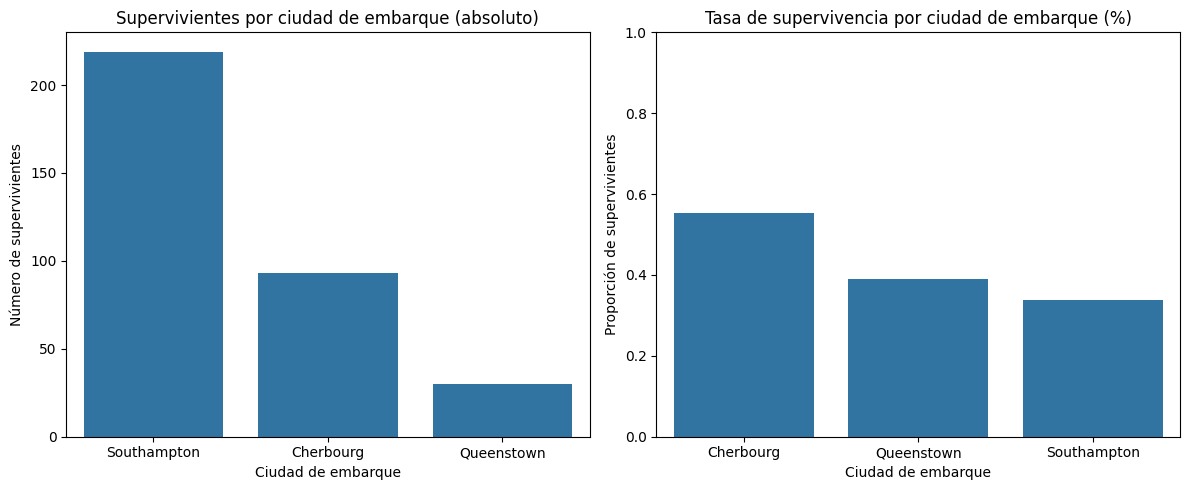

Test de independencia chi-cuadrado entre 'embark_town' y 'alive'
Tabla de contingencia:
alive         no  yes
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219

Estadístico $\chi^2$ = 25.964452881874784
p-valor = 2.3008626481449577e-06
Existe una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia.


In [23]:
frec_abs_embark = df_modif[df_modif["alive"] == "yes"]["embark_town"].value_counts()
frec_rel_embark = (df_modif.groupby("embark_town")["alive"].value_counts(normalize=True).unstack()["yes"])

#Gráficos
plt.figure(figsize=(12, 5))

#Absolutos
plt.subplot(1, 2, 1)
sns.barplot(x=frec_abs_embark.index, y=frec_abs_embark.values)
plt.title("Supervivientes por ciudad de embarque (absoluto)")
plt.ylabel("Número de supervivientes")
plt.xlabel("Ciudad de embarque")

#Relativos
plt.subplot(1, 2, 2)
sns.barplot(x=frec_rel_embark.index, y=frec_rel_embark.values)
plt.title("Tasa de supervivencia por ciudad de embarque (%)")
plt.ylabel("Proporción de supervivientes")
plt.xlabel("Ciudad de embarque")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

#Test chi-cuadrado
contingencia_embark = pd.crosstab(df_modif["embark_town"], df_modif["alive"])
chi2, p, dof, expected = chi2_contingency(contingencia_embark)

print("Test de independencia chi-cuadrado entre 'embark_town' y 'alive'")
print("Tabla de contingencia:")
print(contingencia_embark)
print(f"\nEstadístico $\\chi^2$ = {chi2}")
print(f"p-valor = {p}")

if p < 0.05:
    print("Existe una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia.")
else:
    print("No se detecta una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia.")

#### Análisis absoluto
En términos absolutos, el mayor número de supervivientes embarcaron en **Southampton**, seguidos de **Cherbourg** y finalmente **Queenstown**

#### Análisis relativo
En términos relativos (proporción de supervivientes dentro de cada ciudad), la **tasa de supervivencia** fue mayor en **Cherbourg**, seguida de **Queenstown** y finalmente **Southampton**:

Esto indica que, aunque Southampton tuvo más supervivientes en total, pues es donde más gente embarcó, la probabilidad de sobrevivir fue mayor para quienes embarcaron en Cherbourg.

#### Test de independencia (Chi-cuadrado)
Se realizó un test $\chi^2$ para analizar si existe una relación estadísticamente significativa entre la ciudad de embarque (`embark_town`) y la variable `alive` (supervivencia).

Dado que el p-valor es muy cercano a 0, **existe una relación estadísticamente significativa** entre la ciudad de embarque y la probabilidad de haber sobrevivido al Titanic.

### 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

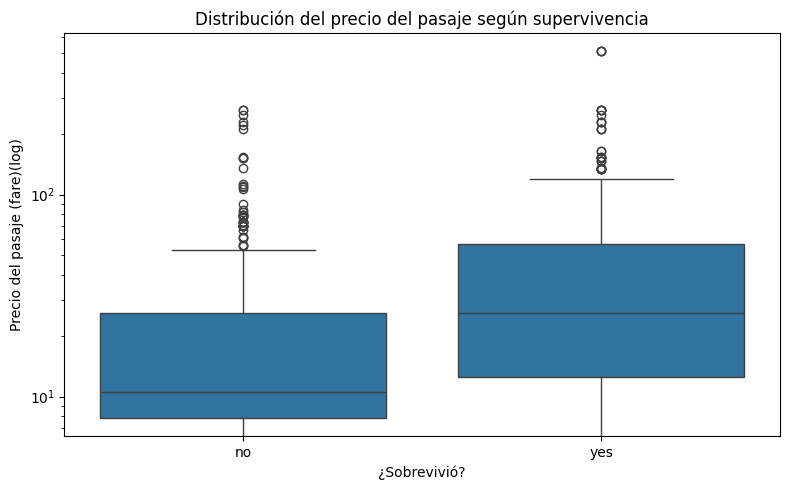

Estadístico U = 129951.5
p-valor = 4.553477179250237e-22
Existe una diferencia estadísticamente significativa en el precio del billete entre quienes sobrevivieron y quienes no.


In [30]:
from scipy.stats import mannwhitneyu

#Ahora estamos comparando una numérica continua con una categórica binaria, usamos el boxplot para poder ver la dispersión y demás
plt.figure(figsize=(8, 5))
sns.boxplot(x="alive", y="fare", data=df_modif)
plt.yscale("log")  #Escala logarítmica, puesto que sino los outliers hacen que sea menos visual
plt.title("Distribución del precio del pasaje según supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Precio del pasaje (fare)(log)")
plt.tight_layout()
plt.show()

#Por lo dicho arriba, ahora usamos Mann Whitney en vez de chi cuadrado
fare_supervivientes = df_modif[df_modif["alive"] == "yes"]["fare"]
fare_fallecidos = df_modif[df_modif["alive"] == "no"]["fare"]

stat, p = mannwhitneyu(fare_supervivientes, fare_fallecidos, alternative="two-sided")

print(f"Estadístico U = {stat}")
print(f"p-valor = {p}")

if p < 0.05:
    print("Existe una diferencia estadísticamente significativa en el precio del billete entre quienes sobrevivieron y quienes no.")
else:
    print("No se detecta una diferencia significativa en el precio del billete según la supervivencia.")

### 5. Existen pasajeros que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [ ]:
pasajeros_gratis = df_modif[df_modif["fare"] == 0]
print("Pasajeros que no pagaron billete:")
display(pasajeros_gratis)  #Nuevo descubrimiento, para formatear bonito en el notebook pero poder ejecutar varias cosas a la vez (equivalente a poner en una celda vacia "df" asecas)

print("\nDistribución por clase:")
print(pasajeros_gratis["class"].value_counts())
print("\nDistribución por ciudad de embarque:")
print(pasajeros_gratis["embark_town"].value_counts())
print("\nSupervivencia:")
print(pasajeros_gratis["alive"].value_counts())

max_fare = df_modif["fare"].max()
print("\nPasajero con el billete más caro:")
display(df_modif[df_modif["fare"] == max_fare])

Pasajeros que no pagaron billete:


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0



Distribución por clase:
class
Second    6
First     5
Third     4
Name: count, dtype: int64

Distribución por ciudad de embarque:
embark_town
Southampton    15
Name: count, dtype: int64

Supervivencia:
alive
no     14
yes     1
Name: count, dtype: int64

Pasajero con el billete más caro:


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


Se encontraron **15 pasajeros** que no pagaron billete.

- Todos ellos eran **hombres adultos** y embarcaron en **Southampton**.
- Las clases en las que viajaban están bastante repartidas.
- Solo **uno** de ellos sobrevivió, los otros **14 fallecieron**.

Mi conclusión es que puede que fueran **tripulación** o similares, puesto que no tiene sentido que si viajan sin billete estén repartidos también por las clases altas. Además, embarcan todos en Southampton, como la mayoría de tripulación y viajeros, y son hombres que viajan solos. Por último, la mayoría fallecen, lo cual también concuerda puesto que en los procesos de evacuación, siempre se da prioridad a viajeros antes que a tripulación.

#### Pasajeros con el billete más caro
El billete más caro costó **512,33** y fue compartido por **tres pasajeros**:

- Todos viajaban en **primera clase** y embarcaron en **Cherbourg**.
- Se trata de **dos hombres** y **una mujer**.
- Los **tres sobrevivieron**.

Esto refuerza la hipótesis de que viajar en primera clase y pagar un precio elevado **aumentaba considerablemente las posibilidades de supervivencia**, posiblemente debido a la **proximidad a los botes salvavidas** o **prioridad en la evacuación**.

### 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

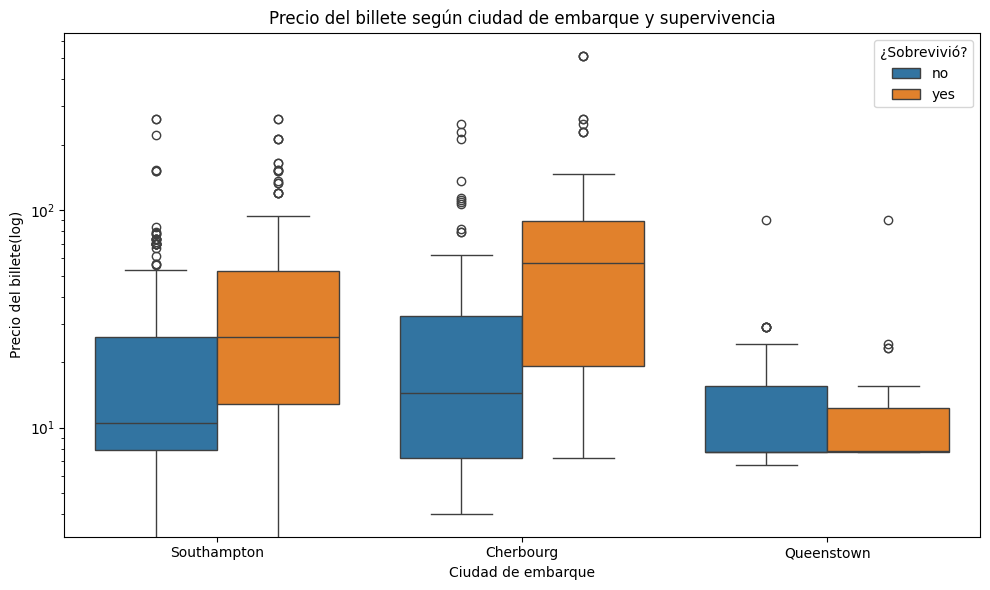

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_modif, x="embark_town", y="fare", hue="alive")
plt.yscale("log")  #Escala logarítmica, puesto que sino los outliers hacen que sea menos visual
plt.title("Precio del billete según ciudad de embarque y supervivencia")
plt.xlabel("Ciudad de embarque")
plt.ylabel("Precio del billete(log)")
plt.legend(title="¿Sobrevivió?")
plt.tight_layout()
plt.show()

- **Cherbourg** muestra los billetes más caros en general, y en particular entre los **supervivientes**.
- En todas las ciudades, los pasajeros que **sobrevivieron** tienden a haber pagado más que los que **fallecieron**.
- En **Queenstown**, la diferencia entre supervivientes y fallecidos en cuanto a precio es mucho menor, probablemente porque la mayoría viajaba en tercera clase.

Visualmente, se observa una tendencia clara: **a mayor precio del billete, mayores probabilidades de supervivencia**, y esto varía según la ciudad de embarque.  
Especialmente en Cherbourg y Southampton, el precio parece estar relacionado con el acceso a clases superiores y, por tanto, a mejores oportunidades de sobrevivir.

### 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

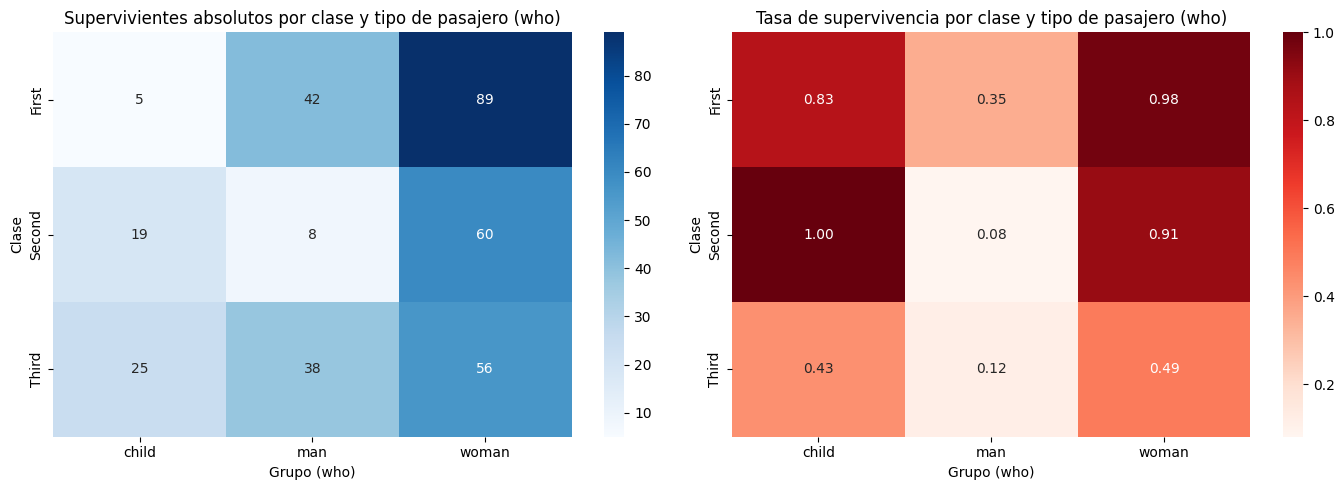

In [39]:
frec_abs = (df_modif[df_modif["alive"] == "yes"].groupby(["class", "who"]).size().unstack())
frec_rel = (df_modif.groupby(["class", "who"])["alive"].value_counts(normalize=True).unstack().fillna(0))
frec_rel_sobrevivir = frec_rel["yes"].unstack()

#Gráficos
#Usaremos un mapa de calor porque para cada clase y grupo de edad queremos ver la tasa de supervivencia (una variable numérica)
plt.figure(figsize=(14, 5))

#Absoluto
plt.subplot(1, 2, 1)
sns.heatmap(frec_abs, annot=True, fmt=".0f", cmap="Blues")  #annot para mostrar el numero en la celda, fmt los decimales, cmap la gama de colores
plt.title("Supervivientes absolutos por clase y tipo de pasajero (who)")
plt.xlabel("Grupo (who)")
plt.ylabel("Clase")

#Relativo
plt.subplot(1, 2, 2)
sns.heatmap(frec_rel_sobrevivir, annot=True, fmt=".2f", cmap="Reds")
plt.title("Tasa de supervivencia por clase y tipo de pasajero (who)")
plt.xlabel("Grupo (who)")
plt.ylabel("Clase")

plt.tight_layout()
plt.show()

#### Análisis absoluto
El grupo con mayor número de supervivientes en términos absolutos fue el de **mujeres de primera clase**, con **89** supervivientes. Le siguen:

- **Mujeres de tercera clase**: 56
- **Hombres de primera clase**: 42
- **Niños de tercera clase**: 25

Esto indica que, aunque las mujeres de primera clase tuvieron prioridad de evacuación, también hubo bastantes mujeres y niños supervivientes en tercera clase.

#### Análisis relativo (proporción de supervivencia)
En términos relativos (proporción de supervivientes dentro de cada subgrupo), destacan:

- **Niños de segunda clase**: **100% de supervivencia**
- **Mujeres de primera clase**: ~98%
- **Mujeres de segunda clase**: ~91%
- **Niños de primera clase**: ~83%

En cambio, los hombres en segunda y tercera clase tuvieron tasas muy bajas:

- **Hombres de segunda clase**: ~8%
- **Hombres de tercera clase**: ~12%

#### Conclusión

Los datos muestran que el grupo que más sobrevivió en términos **absolutos** fueron las **mujeres de primera clase**, y en términos **relativos**, los **niños de segunda clase** y las **mujeres en clases altas**.

En contraste, ser hombre, especialmente en segunda o tercera clase, supuso una probabilidad muy baja de supervivencia.

### 8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

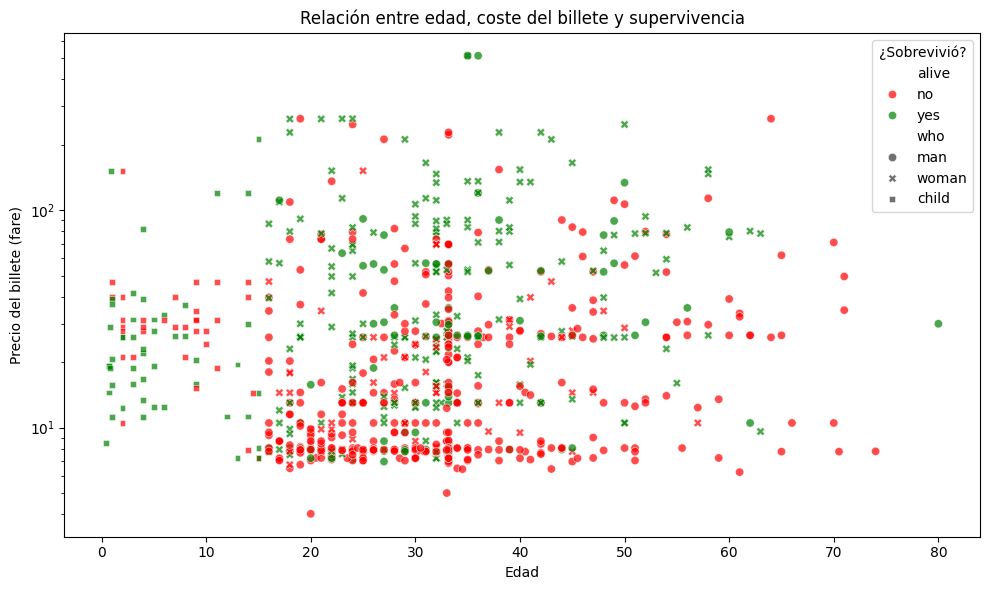

In [42]:
#Usaremos scatterplot, dos variables numéricas continuas frente a una categórica binaria
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_modif,
    x="age",
    y="fare",
    hue="alive",
    style="who",            
    alpha=0.7,
    palette={"yes": "green", "no": "red"})  
#hue la leyenda, alpha para la opacidad de los puntos (si hay muchos y es 1 se superponen y no se distingue nada), palette los colores para la leyenda, style forma distinta para cada grupo de edad
plt.title("Relación entre edad, coste del billete y supervivencia")
plt.xlabel("Edad")
plt.ylabel("Precio del billete (fare)")
plt.yscale("log")  #Log para visualización (por los outliers)
plt.legend(title="¿Sobrevivió?")
plt.tight_layout()
plt.show()

Este es el gráfico que menos me gusta, pero podemos sacar algunas conclusiones:

- A **mayor precio del billete**, hay mayor proporción de puntos verdes → la **supervivencia aumenta** con el precio.
- La **edad no muestra una relación clara** con la supervivencia de forma directa, aunque:
  - **Niños** (puntos cuadrados) tienden a sobrevivir más.
  - **Mujeres** (cruces) también tienen más verde que los hombres.
- Muchos adultos entre 20 y 40 años con billetes baratos fallecieron → el grupo con más puntos rojos.

#### Conclusión

Existe una relación clara entre el **precio del billete y la probabilidad de supervivencia**: los pasajeros que pagaron más (probablemente de clase alta) sobrevivieron más.

Por su parte, la **edad**, por sí sola, **no es determinante**, pero combinada con el **tipo de pasajero (`who`)** sí refleja patrones:
- **Niños y mujeres** tienen mayor proporción de supervivencia.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [43]:
df_viajes_jun = pd.read_csv("./data/dataset_viajes_jun.csv")
df_viajes_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


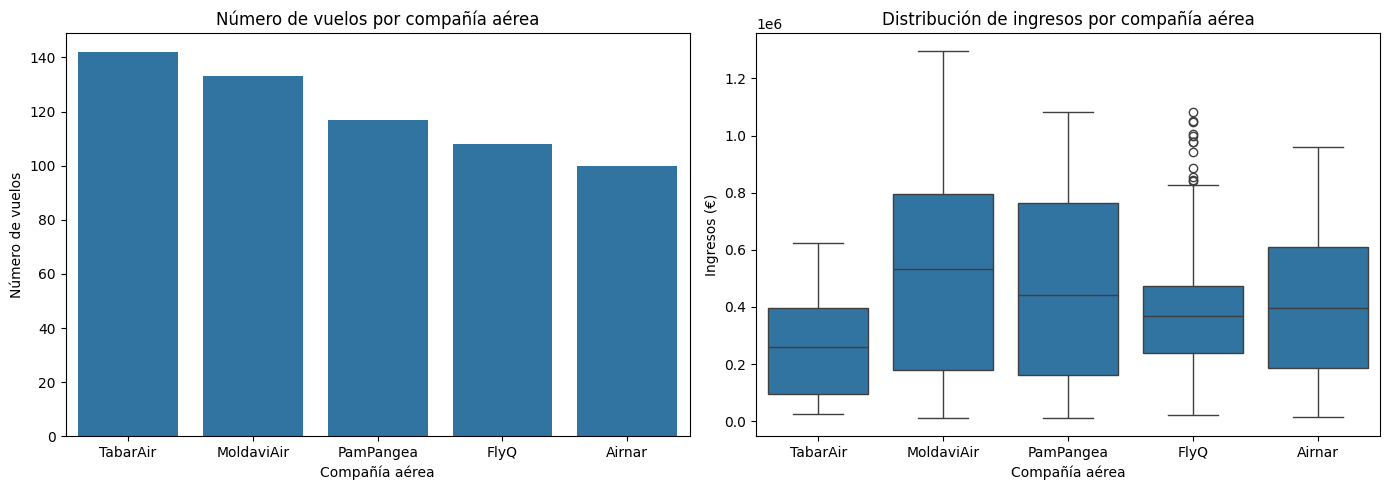

In [44]:
plt.figure(figsize=(14, 5))

#Subplot 1: número de vuelos por compañía
plt.subplot(1, 2, 1)
sns.countplot(data=df_viajes_jun, x="aircompany", order=df_viajes_jun["aircompany"].value_counts().index)
plt.title("Número de vuelos por compañía aérea")
plt.xlabel("Compañía aérea")
plt.ylabel("Número de vuelos")

#Subplot 2: distribución de ingresos por compañía
plt.subplot(1, 2, 2)
sns.boxplot(data=df_viajes_jun, x="aircompany", y="ingresos", order=df_viajes_jun["aircompany"].value_counts().index)
plt.title("Distribución de ingresos por compañía aérea")
plt.xlabel("Compañía aérea")
plt.ylabel("Ingresos (€)")

plt.tight_layout()
plt.show()

#### Distribución de vuelos
El gráfico de la izquierda muestra el número de vuelos por compañía aérea:

- **TabarAir**, nuestra compañía, es la que mayor número de vuelos ha realizado en Junio.

#### Ingresos por vuelo
El boxplot de la derecha representa la distribución de ingresos por vuelo para cada compañía:

- Aunque **FlyQ** y **TabarAir** operan muchos vuelos, **FlyQ** presenta una mayor dispersión en ingresos, con valores muy altos en algunos vuelos.
- **TabarAir** tiene una distribución más concentrada, aunque con buenos valores centrales.

#### Conclusión llamativa
Aunque TabarAir opera muchos vuelos, no es necesariamente la compañía con **ingresos más altos por vuelo**. Destacan casos de **FlyQ** con ingresos especialmente elevados en ciertos trayectos (los outliers)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

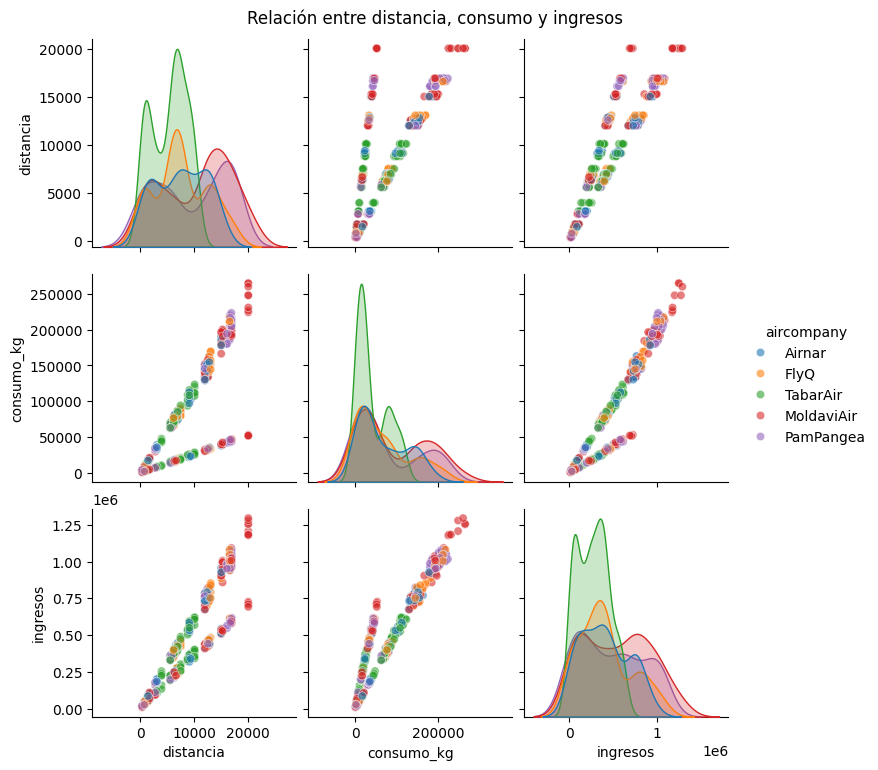

In [52]:
#Pairplot para ir comparando las tres variables dos a dos
sns.pairplot(
    df_viajes_jun,
    vars=["distancia", "consumo_kg", "ingresos"],
    hue="aircompany",
    plot_kws={"alpha": 0.6}  #aqui personalizamos los scatter dentro del pairplot, solo estamos tocando la opacidad de los puntos en este caso
)
plt.suptitle("Relación entre distancia, consumo y ingresos", y = 1.02) #Para que no se nos meta el título encima
plt.show()

- Existe una **fuerte correlación lineal positiva entre `distancia` y `consumo_kg`**: los vuelos más largos consumen más combustible, como es lógico.
- También se observa una **clara relación positiva entre `distancia` e `ingresos`**: a mayor distancia, más ingresos, aunque con algo más de dispersión.
- **`consumo_kg` e `ingresos`** también están correlacionados de forma muy directa, lo que sugiere que el coste energético y el beneficio van de la mano.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

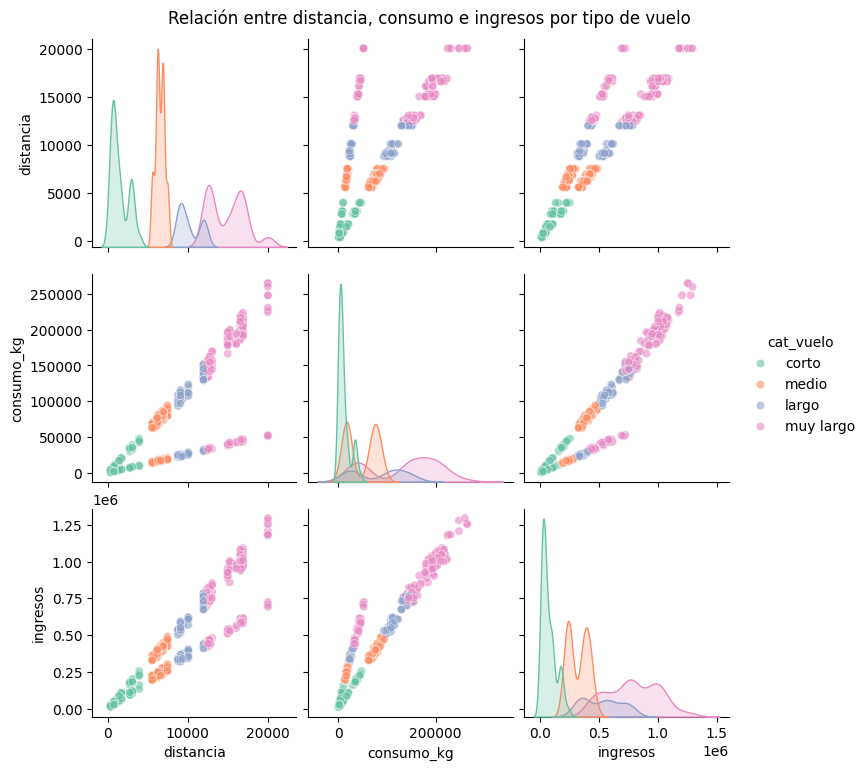

In [51]:
df_viajes_jun["cat_vuelo"] = pd.cut(
    df_viajes_jun["distancia"],
    bins=[0, 4000, 8000, 12000, df_viajes_jun["distancia"].max()],
    labels=["corto", "medio", "largo", "muy largo"]
)

sns.pairplot(
    df_viajes_jun,
    vars=["distancia", "consumo_kg", "ingresos"],
    hue="cat_vuelo",
    palette="Set2",
    plot_kws={"alpha": 0.6},
)
plt.suptitle("Relación entre distancia, consumo e ingresos por tipo de vuelo", y = 1.02)  #para que no se nos meta el titulo encima
plt.show()

Creamos una nueva variable categórica `cat_vuelo` a partir de la variable continua `distancia`, dividiendo los vuelos en cuatro categorías:

- **corto**: hasta 4000 km
- **medio**: 4000–8000 km
- **largo**: 8000–12000 km
- **muy largo**: más de 12000 km

#### Resultados del análisis multivariante

El nuevo `pairplot` coloreado por `cat_vuelo` permite identificar claramente los patrones de relación entre distancia, consumo e ingresos:

- **Patrones lineales** más definidos que antes: al agrupar por tipo de vuelo, se observan **trayectorias paralelas** que reflejan una **relación proporcional muy clara**.
- Los vuelos **más largos** generan claramente más ingresos y más consumo, y se separan visualmente de los cortos.
- La categoría `muy largo` (en rosa) tiene mayor dispersión en ingresos y consumo.
- La separación por color **facilita mucho más la interpretación** comparado con el análisis anterior por compañía aérea.

Este enfoque muestra que **la categoría de distancia (`cat_vuelo`) explica mejor la variabilidad de consumo e ingresos** que la compañía aérea por sí sola.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.